In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

## 读取gmst30

In [5]:
gmst30 = pd.read_excel("工作簿1.xlsx",header=None)
gmst30 = gmst30.T
gmst30.shape
date30 = pd.date_range(start="1880-1-1",freq="MS",periods=len(gmst30))
gmst30.index = date30

gmst30.columns = ['gmst30']
gmst30.columns.values[0]

'gmst30'

## 以六月为中心的gmst

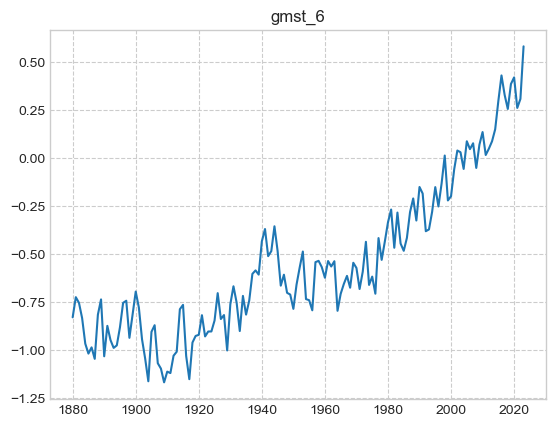

In [35]:
gmst30.shape
gmst30_len = len(gmst30)
yearstar = np.arange(0,gmst30_len,12)
yearend = np.arange(11,gmst30_len,12)
slen = min(len(yearstar),len(yearend))
gmst_12 = np.zeros([slen,1])
mmm = 0;
for i, j in zip(yearstar[:slen],yearend[:slen]):
    gsum = 0
    for k in range(i,j+1):
        gsum+= gmst30.iloc[k,:]
    gmst_12[mmm,0] = gsum.item()/12
    mmm+=1
data12 = pd.date_range(start='1880/1/1',periods=slen,freq='YS')
gmst_6 = pd.DataFrame(gmst_12,index=data12)
plt.figure()
plt.title('gmst_6')
plt.plot(gmst_6)
plt.show()


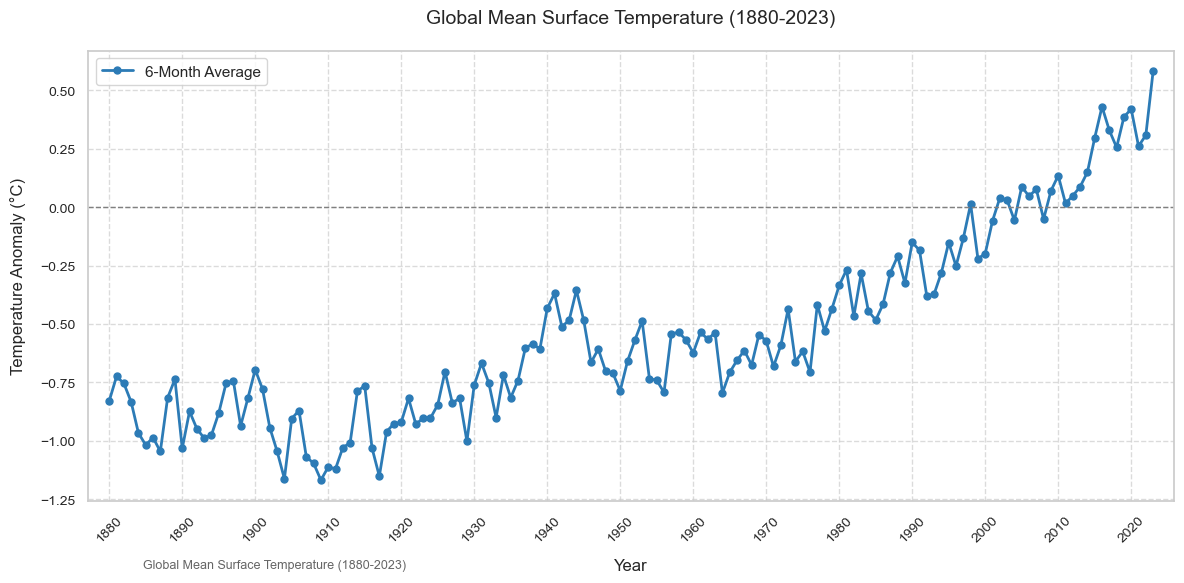

In [36]:
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.dates import YearLocator, DateFormatter

# Set seaborn style
sns.set(style="whitegrid", palette="muted")

# Create figure with custom size
plt.figure(figsize=(12, 6))

# Plot data with enhanced styling
plt.plot(gmst_6.index, gmst_6.values, 
         color='#2c7bb6', linewidth=2, marker='o', markersize=5,
         label='6-Month Average')

# Format date axis
ax = plt.gca()
ax.xaxis.set_major_locator(YearLocator(10))  # Show year every 10 years
ax.xaxis.set_major_formatter(DateFormatter('%Y'))
plt.xticks(rotation=45)

# Add labels and title
plt.title('Global Mean Surface Temperature (1880-{})'.format(gmst_6.index[-1].year), 
          fontsize=14, pad=20)
plt.xlabel('Year', fontsize=12, labelpad=10)
plt.ylabel('Temperature Anomaly (°C)', fontsize=12, labelpad=10)

# Add grid and legend
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend(frameon=True, facecolor='white')

# Add proper margins
plt.margins(x=0.02)

# Customize tick parameters
ax.tick_params(axis='both', which='major', labelsize=10)

# Add a zero reference line
plt.axhline(0, color='gray', linestyle='--', linewidth=1)

# Add data source annotation
plt.text(0.05, -0.15, f'Global Mean Surface Temperature ({data12[0].year}-{data12[-1].year})', 
         transform=ax.transAxes, fontsize=9, color='#666666')

# Adjust layout
plt.tight_layout()

# Show plot
plt.show()

## gmst_12

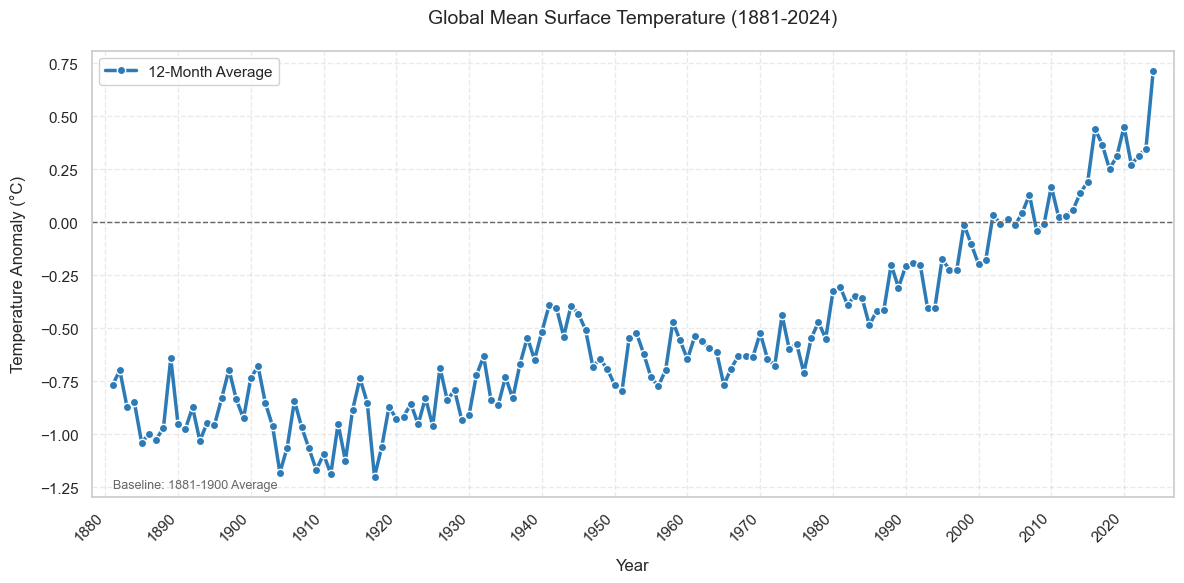

In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.dates import YearLocator, DateFormatter

# 数据预处理部分修正
gmst30_1 = gmst30.copy().iloc[5:,:]  # 从第6个月开始（假设每月1行）
gmst30_1_len = len(gmst30_1)

# 修正索引计算（使用新数据长度）
yearstar = np.arange(0, gmst30_1_len, 12)  # 使用截断后的数据长度
yearend = np.arange(11, gmst30_1_len, 12)
slen = min(len(yearstar), len(yearend))

# 初始化结果数组
gmst_12_2 = np.zeros([slen, 1])

# 数据聚合逻辑修正
mmm = 0
for i, j in zip(yearstar[:slen], yearend[:slen]):
    gsum = 0
    # 使用截断后的数据集 gmst30_1
    for k in range(i, min(j+1, gmst30_1_len)):  # 添加边界保护
        gsum += gmst30_1.iloc[k, 0]  # 假设温度数据在第0列
    gmst_12_2[mmm, 0] = gsum / 12
    mmm += 1

# 生成正确的时间索引（从1881年开始）
data12 = pd.date_range(start='1881-01-01', periods=slen, freq='YS')  # 修正日期格式
gmst_12 = pd.DataFrame(gmst_12_2, index=data12, columns=['Temperature'])

# 可视化美化
sns.set_style("whitegrid", {'grid.linestyle': '--', 'grid.alpha': 0.6})
plt.figure(figsize=(12, 6))

# 带置信区间的平滑曲线（假设有标准差列可添加）
plt.plot(gmst_12.index, gmst_12['Temperature'], 
         color='#2c7bb6', linewidth=2.5, 
         marker='o', markersize=6, markeredgecolor='w',
         label='12-Month Average')

# 专业级图表元素
plt.title(f'Global Mean Surface Temperature ({data12[0].year}-{data12[-1].year})', 
         fontsize=14, pad=20)
plt.xlabel('Year', fontsize=12, labelpad=10)
plt.ylabel('Temperature Anomaly (°C)', fontsize=12, labelpad=10)

# 高级日期格式
ax = plt.gca()
ax.xaxis.set_major_locator(YearLocator(10))  # 每10年一个主刻度
ax.xaxis.set_major_formatter(DateFormatter('%Y'))
plt.xticks(rotation=45, ha='right')

# 参考线和注释
plt.axhline(0, color='#666666', linestyle='--', linewidth=1)
plt.text(0.02, 0.02, 'Baseline: 1881-1900 Average', 
         transform=ax.transAxes, color='#666666', fontsize=9)

# 图例和网格优化
plt.legend(loc='upper left', frameon=True, framealpha=0.9)
plt.grid(True, which='both', linestyle='--', alpha=0.4)

# 边距调整
plt.margins(x=0.02)
plt.tight_layout()

# 保存高质量图片
plt.savefig('GMST_12mo_Anomaly.png', dpi=300, bbox_inches='tight')
plt.show()

## 尝试使用其他代码，进行操作

In [59]:
GMST_EEMD = pd.read_csv("GMST_EEMD.csv",header=0,index_col=0)
GMST_EEMD.index = pd.to_datetime(gmst_6.index)
gmst_6 = GMST_EEMD
gmst_12 = GMST_EEMD

## 向前差分

In [40]:
def ddf(df):
    m = len(df)
    n = np.zeros([m-1,1])
    for i in range(0,m-1):
        n[i,0] = (-df.iloc[i,0]+df.iloc[i+1,0])
    daten = df.index[1:]
    s = pd.DataFrame(n,columns = ['dgmst'],index = daten)
    return s

In [60]:
d_gmst_12 = ddf(gmst_12)
d_gmst_6 = ddf(gmst_6)
d_gmst_6

,dgmst
1881-01-01,0.006509
1882-01-01,-0.010577
1883-01-01,-0.012055
1884-01-01,-0.007286
1885-01-01,-0.009779
...,...
2019-01-01,0.031293
2020-01-01,0.025003
2021-01-01,0.010285
2022-01-01,-0.004180


## 中心差分

In [17]:
def ddf(df):
    m = len(df)
    n = np.zeros([m-2,1])
    for i in range(1,m-2):
        n[i-1,0] = (-df.iloc[i,0]+df.iloc[i+2,0])/2
    daten = df.index[1:-1]
    s = pd.DataFrame(n,columns = ['dgmst'],index = daten)
    return s
d_gmst_12 = ddf(gmst_12)
d_gmst_6 = ddf(gmst_6)
d_gmst_6

,dgmst
1881,-0.011316
1882,-0.009671
1883,-0.008533
1884,-0.007300
1885,-0.007783
...,...
2018,0.028148
2019,0.017644
2020,0.003053
2021,0.001247


## 计算std

### 要正确处理 datafram 和 serise 和具体值之间的差别

In [71]:
std_6 = d_gmst_6.std().item()
std_12 = d_gmst_12.std().item()
threshold_6 = 1.58*std_6
threshold_12 =1.58*std_12

over_6=d_gmst_6[d_gmst_6['dgmst']>=threshold_6 ]### df[df]会出现mask
over_12=d_gmst_12[d_gmst_12['dgmst']>=threshold_12]
over_12

,dgmst
1935-01-01,0.061476
1937-01-01,0.044658
1938-01-01,0.058810
1976-01-01,0.044619
1978-01-01,0.048048
1979-01-01,0.033998
1981-01-01,0.041773
1997-01-01,0.035986
2001-01-01,0.048334
2006-01-01,0.033637


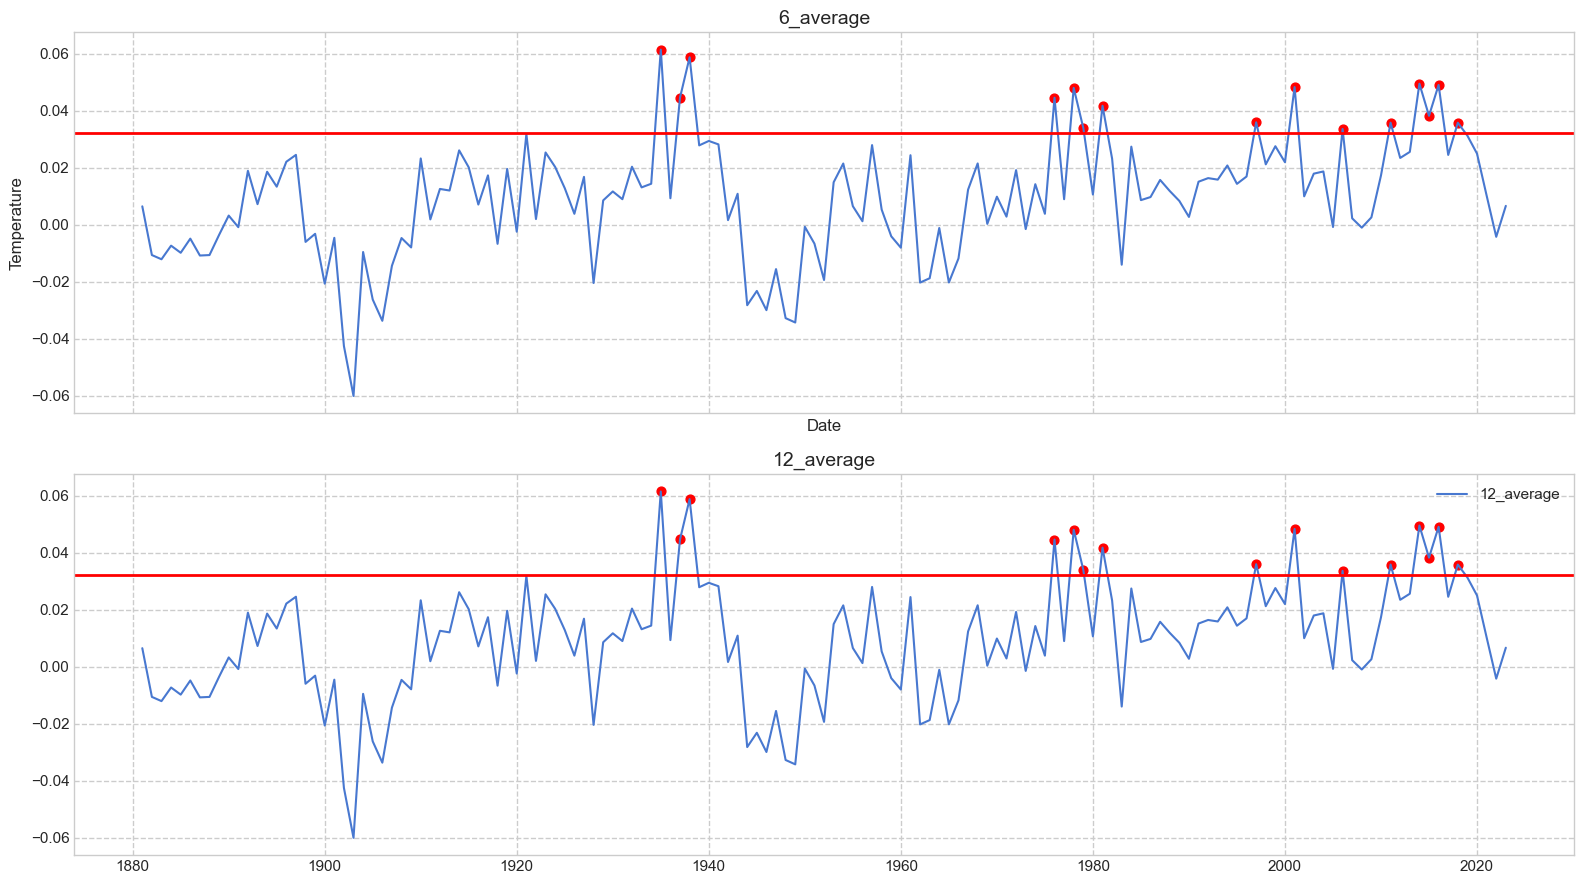

In [72]:
fig,axes = plt.subplots(2,1,figsize = (16,9),sharex
                        =True)
axes[0].plot(d_gmst_6.index,d_gmst_6,label = '6_average')
axes[0].scatter(over_6.index,over_6,marker = "o",s = 40,color = "red",alpha =1)
axes[0].axhline(threshold_6,lw = 2.0,c = "red")
axes[1].plot(d_gmst_12.index,d_gmst_12,label = '12_average')
axes[1].scatter(over_12.index,over_12,marker = "o",s = 40,color = "red",alpha =1)
axes[1].axhline(threshold_12,lw = 2.0,c = "red")
plt.legend(loc='best')  # 自动获取plot时设置的label
    
# 添加轴标签和标题（提升可读性）
axes[0].set_xlabel('Date', fontsize=12)
axes[0].set_ylabel('Temperature', fontsize=12)
axes[0].set_title("6_average", fontsize=14)
axes[1].set_title("12_average", fontsize=14)

plt.tight_layout()  # 自动调整布局

plt.show()

### 查看一下快速上升的时间

In [73]:
over_6.index

DatetimeIndex(['1935-01-01', '1937-01-01', '1938-01-01', '1976-01-01',
               '1978-01-01', '1979-01-01', '1981-01-01', '1997-01-01',
               '2001-01-01', '2006-01-01', '2011-01-01', '2014-01-01',
               '2015-01-01', '2016-01-01', '2018-01-01'],
              dtype='datetime64[ns]', freq=None)

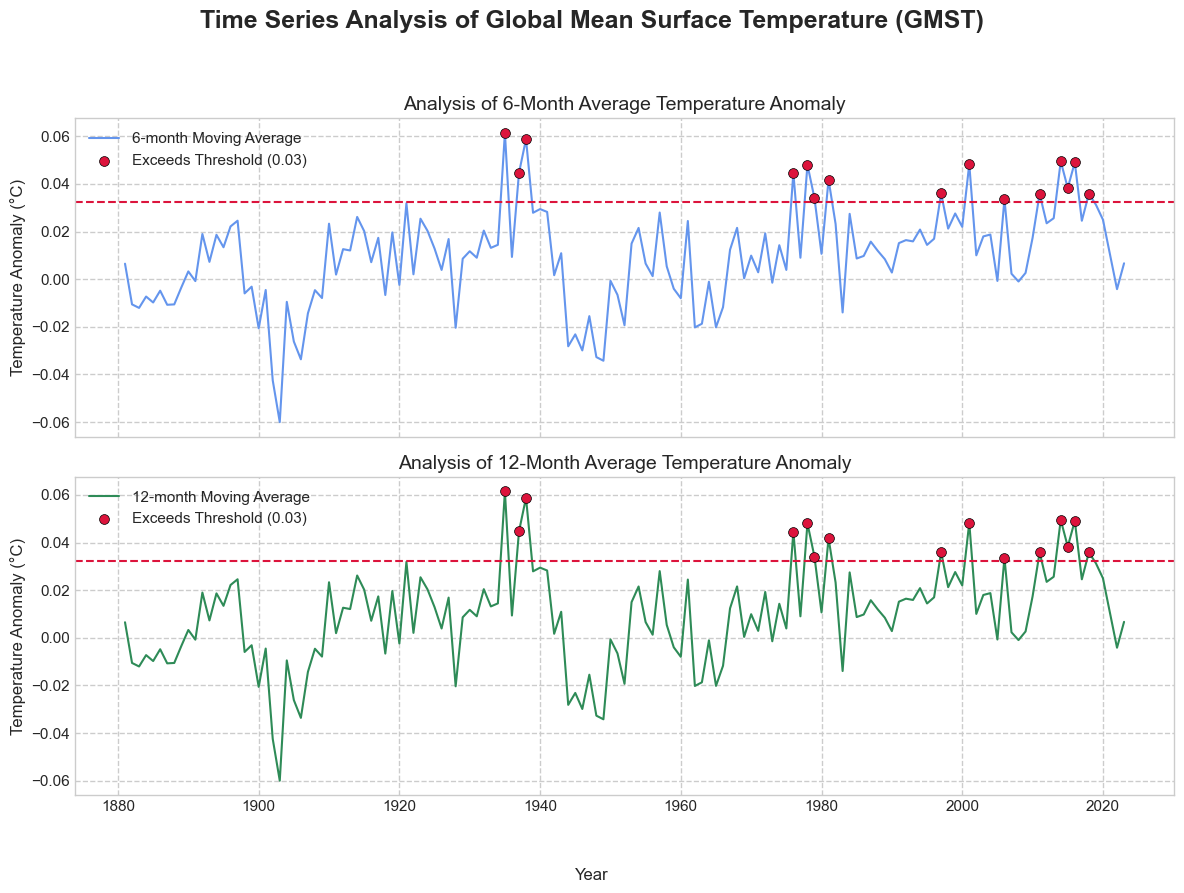

In [74]:
plt.style.use('seaborn-v0_8-whitegrid')
# 设置全局字体，确保在不同系统上表现一致
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = ['Arial', 'DejaVu Sans', 'Liberation Sans']

plt.rcParams['grid.linestyle'] = '--'
# --- 3. 创建子图 ---
# 创建一个2行1列的图，并共享X轴，这对于比较时间序列非常重要
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(12, 9), sharex=True)


# --- 4. 绘制第一个子图 (6-month average) ---
# 绘制主数据线，使用沉稳的蓝色
axes[0].plot(d_gmst_6.index, d_gmst_6, label='6-month Moving Average', color='cornflowerblue', linewidth=1.5)

# 绘制超过阈值的散点，使用醒目的红色，并添加黑色描边使其更清晰
axes[0].scatter(over_6.index, over_6, marker="o", s=50, color="crimson", 
                label=f'Exceeds Threshold ({threshold_6:.2f})', 
                edgecolor='black', linewidth=0.5, zorder=5) # zorder确保点在最上层

# 绘制阈值参考线，使用虚线样式
axes[0].axhline(threshold_6, lw=1.5, color="crimson", linestyle='--')

# 设置子图标题和Y轴标签
axes[0].set_title("Analysis of 6-Month Average Temperature Anomaly", fontsize=14)
axes[0].set_ylabel("Temperature Anomaly (°C)", fontsize=12)
axes[0].legend(loc='upper left')


# --- 5. 绘制第二个子图 (12-month average) ---
# 绘制主数据线，使用稳重的绿色
axes[1].plot(d_gmst_12.index, d_gmst_12, label='12-month Moving Average', color='seagreen', linewidth=1.5)

# 绘制超过阈值的散点
axes[1].scatter(over_12.index, over_12, marker="o", s=50, color="crimson", 
                label=f'Exceeds Threshold ({threshold_12:.2f})', 
                edgecolor='black', linewidth=0.5, zorder=5)

# 绘制阈值参考线
axes[1].axhline(threshold_12, lw=1.5, color="crimson", linestyle='--')

# 设置子图标题和Y轴标签
axes[1].set_title("Analysis of 12-Month Average Temperature Anomaly", fontsize=14)
axes[1].set_ylabel("Temperature Anomaly (°C)", fontsize=12)
axes[1].legend(loc='upper left')


# --- 6. 美化整个图表 ---
# 为整个图表添加一个主标题
fig.suptitle('Time Series Analysis of Global Mean Surface Temperature (GMST)', fontsize=18, fontweight='bold')

# 因为共享了X轴，所以为整个图表添加一个X轴标签即可
fig.supxlabel('Year', fontsize=12)

# 自动调整布局，防止标题和标签重叠
# rect参数为suptitle留出空间
plt.tight_layout(rect=[0, 0.03, 1, 0.95])


# --- 7. 显示图像 ---
plt.show()



## 绘制两种方法

In [75]:
def plotgmst(d_gmst_6,d_gmst_12,d_gmst_6_1,d_gmst_12_1):
    fig, axes = plt.subplots(nrows=4, ncols=1, figsize=(12, 12), sharex=True)
    
    
    # --- 4. 绘制第一个子图 (6-month average) ---
    # 绘制主数据线，使用沉稳的蓝色
    axes[0].plot(d_gmst_6.index, d_gmst_6, label='the first method', color='cornflowerblue', linewidth=1.5)
    axes[0].plot(gmst_6.index,gmst_6,lw = 1.5,label = 'gmst_6',color = "red")
    # 绘制超过阈值的散点，使用醒目的红色，并添加黑色描边使其更清晰
    
    
    # 设置子图标题和Y轴标签
    axes[0].set_title("the first method of 6", fontsize=14)
    axes[0].set_ylabel("Temperature Anomaly (°C)", fontsize=12)
    axes[0].legend(loc='upper left')
    
    
    # --- 5. 绘制第二个子图 (12-month average) ---
    # 绘制主数据线，使用稳重的绿色
    axes[1].plot(d_gmst_12.index, d_gmst_12, label='the second method', color='seagreen', linewidth=1.5)
    axes[1].plot(gmst_6.index,gmst_6,lw = 1.5,label = 'gmst_6',color = "red")
    # 绘制超过阈值的散点
   
    # 设置子图标题和Y轴标签
    axes[1].set_title("the second method of 6 ", fontsize=14)
    axes[1].set_ylabel("Temperature Anomaly (°C)", fontsize=12)
    axes[1].legend(loc='upper left')
    axes[2].plot(d_gmst_6_1.index, d_gmst_6_1, label='the first method of  12', color='cornflowerblue', linewidth=1.5)
    axes[2].plot(gmst_12.index,gmst_12,lw = 1.5,label = 'gmst_12',color = "red")
    axes[2].set_title("the first method of 12 ", fontsize=14)
    axes[2].set_ylabel("Temperature Anomaly (°C)", fontsize=12)
    axes[2].legend(loc='upper left')
    
    
    # --- 5. 绘制第二个子图 (12-month average) ---
    # 绘制主数据线，使用稳重的绿色
    axes[3].plot(d_gmst_12_1.index, d_gmst_12_1, label='the second method of 12', color='seagreen', linewidth=1.5)
    axes[3].plot(gmst_12.index,gmst_12,lw = 1.5,label = 'gmst_12',color = "red")
    # 绘制超过阈值的散点
   
    # 设置子图标题和Y轴标签
    axes[3].set_title("the second method of 12 ", fontsize=14)
    axes[3].set_ylabel("Temperature Anomaly (°C)", fontsize=12)
    axes[3].legend(loc='upper left')
    
    
    # --- 6. 美化整个图表 ---
    # 为整个图表添加一个主标题
    fig.suptitle('Time Series Analysis of Global Mean Surface Temperature (GMST)', fontsize=18, fontweight='bold')
    
    # 因为共享了X轴，所以为整个图表添加一个X轴标签即可
    fig.supxlabel('Year', fontsize=12)
    
    # 自动调整布局，防止标题和标签重叠
    # rect参数为suptitle留出空间
    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    
    
    # --- 7. 显示图像 ---
    plt.show()


In [76]:
def plot_1(df1, gmst):
    # 复制数据，避免修改原始数据
    df_id_original = df1.copy()
    df = gmst.copy()

    # --- 关键修复：筛选出有效的日期 ---
    # 1. 计算所有可能需要用到的日期
    potential_prev_dates = df_id_original - pd.DateOffset(years=1)
    potential_next_dates = df_id_original + pd.DateOffset(years=1)
    
    # 2. 检查哪些日期的“前一年”和“后一年”都真实存在于数据索引中
    #    使用 .isin() 方法进行高效检查
    valid_mask = potential_prev_dates.isin(df.index) & potential_next_dates.isin(df.index)
    
    # 3. 只保留那些前后日期都有效的原始ID
    df_id = df_id_original[valid_mask]
    
    # 如果筛选后没有任何有效日期，则直接返回原始数据，避免后续错误
    if df_id.empty:
        print("警告：没有找到任何可以进行前后一年计算的有效日期。")
        return df.copy(), df.copy()

    # --- 使用筛选后的安全日期进行计算 ---
    df_id_1 = df_id + pd.DateOffset(years=1)
    df_id_2 = df_id - pd.DateOffset(years=1)

    # .loc 现在只会使用那些我们确认过的、存在的日期，不会再报错
    a = df.loc[df_id].to_numpy() - df.loc[df_id_1].to_numpy()
    b = df.loc[df_id_2].to_numpy() - df.loc[df_id_1].to_numpy()

    df_1 = df.copy()
    for date, k in zip(df_id, a):
        # 注意：您原代码中的 if(data<=df_id[-1]) 逻辑不清晰，
        # 'data' 未定义。这里假设您是想对某个日期之后的所有点进行操作。
        # 如果逻辑不同，请在此处修改。
        df_1.loc[date:] = df_1.loc[date:] + k

    df_2 = df.copy()
    for date, k in zip(df_id_2, b):
         df_2.loc[date:] = df_2.loc[date:] + k
    return df_1,df_2
def plot_2(df1, gmst):
# 复制数据，避免修改原始数据
    df_id_original = df1.copy()
    df = gmst.copy()
    # df_id_original = df_id_original
    df_id_original = pd.to_datetime(df_id_original)
    # --- 关键修复：筛选出有效的日期 ---
    # 1. 计算所有可能需要用到的日期
    potential_prev_dates = df_id_original - pd.DateOffset(years=1)
    potential_next_dates = df_id_original + pd.DateOffset(years=1)
   
    # 2. 检查哪些日期的“前一年”和“后一年”都真实存在于数据索引中
    #    使用 .isin() 方法进行高效检查
    valid_mask = potential_prev_dates.isin(df.index) & potential_next_dates.isin(df.index)
    
    # 3. 只保留那些前后日期都有效的原始ID
    df_id = df_id_original[valid_mask]
    
    # 如果筛选后没有任何有效日期，则直接返回原始数据，避免后续错误
    if df_id.empty:
        print("警告：没有找到任何可以进行前后一年计算的有效日期。")
        return df.copy(), df.copy()
    
    # --- 使用筛选后的安全日期进行计算 ---
    df_id_1 = df_id - pd.DateOffset(years=1)
    df_id_2 = df_id +pd.DateOffset(years=1)
    
    # .loc 现在只会使用那些我们确认过的、存在的日期，不会再报错
    a = df.loc[df_id].to_numpy() - df.loc[df_id_1].to_numpy()
    b = df.loc[df_id_2].to_numpy() - df.loc[df_id_1].to_numpy()
    
    df_1 = df.copy()
    for date, k in zip(df_id, a):
        # 注意：您原代码中的 if(data<=df_id[-1]) 逻辑不清晰，
        # 'data' 未定义。这里假设您是想对某个日期之后的所有点进行操作。
        # 如果逻辑不同，请在此处修改。
        df_1.loc[date:] = df_1.loc[date:] - k
    
    df_2 = df.copy()
    for date, k in zip(df_id, b):
         df_2.loc[date:] = df_2.loc[date:] - k
    return df_1,df_2

In [77]:
gmstb_6_1,gmstb_6_2 =plot_2(over_6.index,gmst_6)
gmstb_12_1,gmstb_12_2=plot_2(over_12.index,gmst_12)

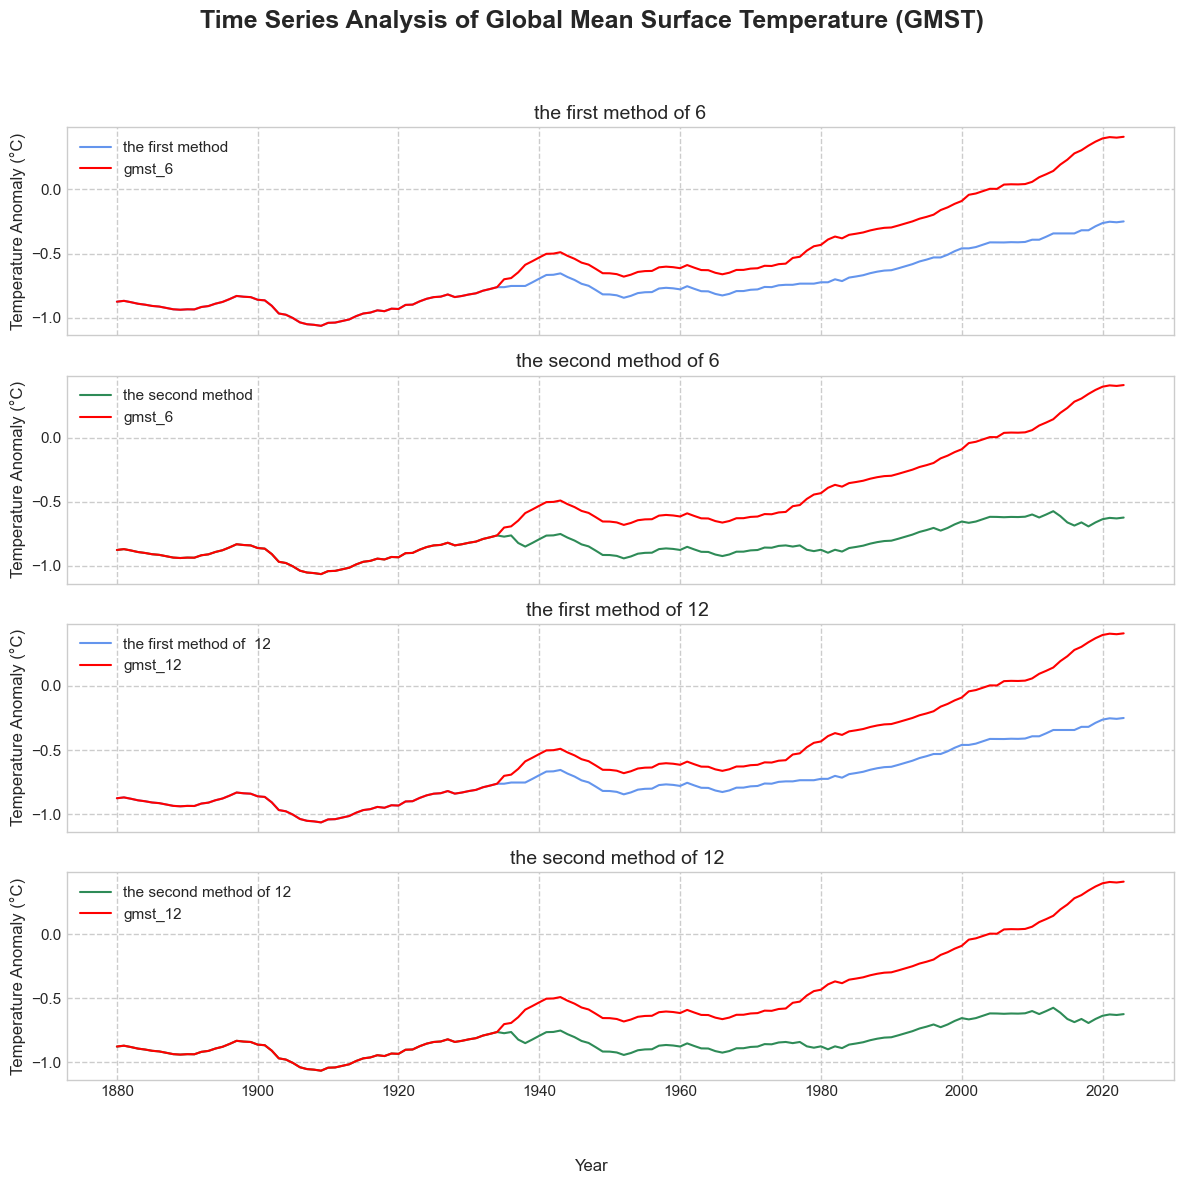

In [78]:
plotgmst(gmstb_6_1,gmstb_6_2,gmstb_12_1,gmstb_12_2)

In [130]:
over_6.index

DatetimeIndex(['1888-01-01', '1905-01-01', '1914-01-01', '1918-01-01',
               '1930-01-01', '1934-01-01', '1940-01-01', '1957-01-01',
               '1977-01-01', '1983-01-01', '1990-01-01', '2023-01-01'],
              dtype='datetime64[ns]', freq=None)

In [132]:
gmstb_6_1.loc['1887-01-01':'1890-01-01']

,0
1887-01-01,-1.046206
1888-01-01,-1.046206
1889-01-01,-0.966631
1890-01-01,-1.262916


In [134]:
gmst_6.loc['1887-01-01':'1890-01-01']

,0
1887-01-01,-1.046206
1888-01-01,-0.816175
1889-01-01,-0.736599
1890-01-01,-1.032885
